In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm

## Task 1

In [3]:
def laplace_solver_gauss_seidel(f, boundary_values, mask, g, max_iterations = 10000, tol = 0.01, guidance = False):
    """
    Solve the Laplace equation with Dirichlet boundary conditions using the Gauss-Seidel method
    
    Parameters:
    - f: Initial guess for the solution
    - boundary_values: Dirichlet boundary values for f on the boundary 
    - mask: Mask
    - g: Guidance field (Laplacian of original picture)
    - max_iterations: Maximum number of iterations
    - tol: Convergence tolerance
    - guidance: option to toggle guidance on or off 
    """
    
    f_old = np.copy(f)
    
    unknown_indices = np.where(mask == 0)
    
    pbar = tqdm(total = max_iterations)
    # Gauss-Seidel iterations
    for iteration in range(max_iterations):
        
        f[:, 0] = boundary_values[:, 0]
        f[:, -1] = boundary_values[:, -1]
        f[0, :] = boundary_values[0, :]
        f[-1, :] = boundary_values[-1, :]
        
        for i, j in zip(*unknown_indices):
            # Gauss-Seidel update formula
            if guidance:
                f[i, j] = 0.25 * (f[i-1, j] + f[i+1, j] + f[i, j-1] + f[i, j+1] + g[i, j])
            else:
                f[i, j] = 0.25 * (f[i-1, j] + f[i+1, j] + f[i, j-1] + f[i, j+1])

        pbar.update(1)
        
        diff = np.max(np.abs(f - f_old))

        if diff < tol:
            print(f'\nThe solution converged after {iteration} iterations')
            break 
        
        f_old = np.copy(f)
        
    pbar.close()
        
    return f
        

### Region of high frequency

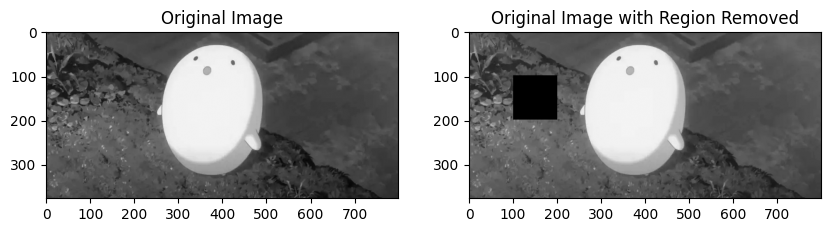

In [4]:
# Load the image
img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax1.imshow(gray_img, cmap='gray')  # Convert BGR to RGB for displaying with matplotlib
ax1.set_title('Original Image')

# Define the region (top-left and bottom-right coordinates)
top_left = (100, 100)
bottom_right = (200, 200)

# Create a mask for the region to be removed
mask = np.ones_like(gray_img)
mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = gray_img * mask

#Dirichlet bonudaries
boundary_values = np.copy(gray_img)
boundary_values[mask == 0] = 0.0 

# Display the original image with the region removed
ax2.imshow(removed_image, cmap='gray')
ax2.set_title('Original Image with Region Removed')

# Show the subplots
plt.show()


 22%|██▏       | 2212/10000 [00:26<01:34, 82.34it/s]


The solution converged after 2211 iterations


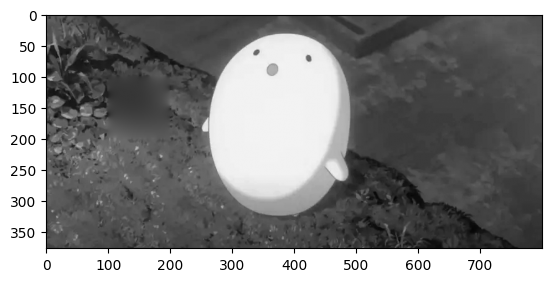

In [5]:
# Initial guess, mark the missing region with NaN
f_initial = np.copy(gray_img)
f_initial[mask == 0] = 0

#Set the Dirichlet boundary conditions using the known region
boundary_values = np.copy(gray_img)

gray_img = np.uint8(gray_img)
g = cv2.Laplacian(gray_img, cv2.CV_64F)

interpolated_image = laplace_solver_gauss_seidel(f_initial, boundary_values, mask, g)
plt.imshow(interpolated_image, cmap='gray')

### Smooth Region

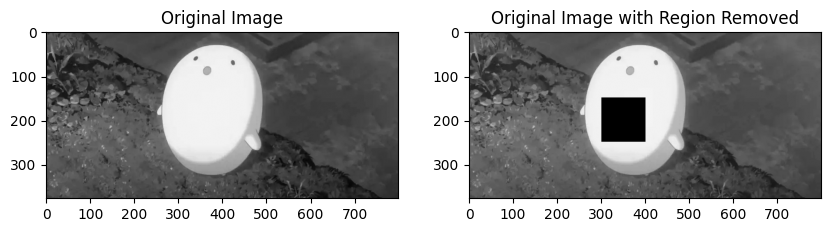

In [6]:
# Load the image
img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax1.imshow(gray_img, cmap='gray')  # Convert BGR to RGB for displaying with matplotlib
ax1.set_title('Original Image')

# Define the region (top-left and bottom-right coordinates)
top_left = (300, 150)
bottom_right = (400, 250)

# Create a mask for the region to be removed
mask = np.ones_like(gray_img)
mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = gray_img * mask

#Dirichlet bonudaries
boundary_values = np.copy(gray_img)
boundary_values[mask == 0] = 0.0 

# Display the original image with the region removed
ax2.imshow(removed_image, cmap='gray')
ax2.set_title('Original Image with Region Removed')

# Show the subplots
plt.show()


 33%|███▎      | 3261/10000 [00:40<01:23, 80.89it/s]


The solution converged after 3260 iterations


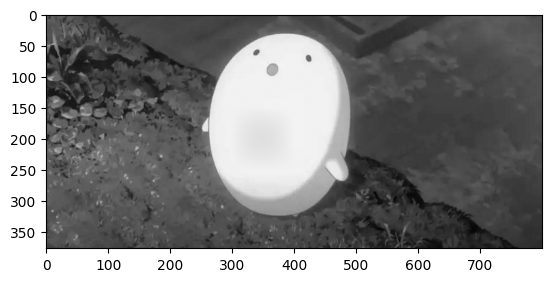

In [7]:
# Initial guess, mark the missing region with NaN
f_initial = np.copy(gray_img)
f_initial[mask == 0] = 0

#Set the Dirichlet boundary conditions using the known region
boundary_values = np.copy(gray_img)

gray_img = np.uint8(gray_img)
g = cv2.Laplacian(gray_img, cv2.CV_64F)

interpolated_image = laplace_solver_gauss_seidel(f_initial, boundary_values, mask, g)
plt.imshow(interpolated_image, cmap='gray')

### Size of selected region increases

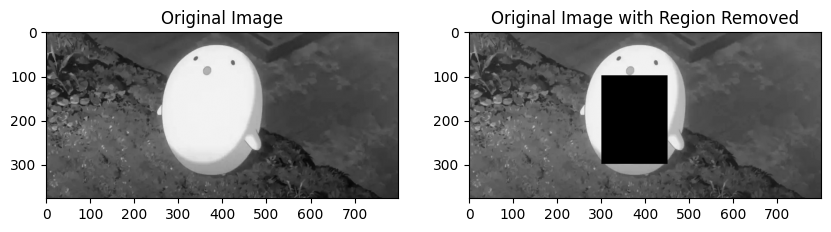

In [8]:
# Load the image
img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax1.imshow(gray_img, cmap='gray')  # Convert BGR to RGB for displaying with matplotlib
ax1.set_title('Original Image')

# Define the region (top-left and bottom-right coordinates)
top_left = (300, 100)
bottom_right = (450, 300)

# Create a mask for the region to be removed
mask = np.ones_like(gray_img)
mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = gray_img * mask

#Dirichlet bonudaries
boundary_values = np.copy(gray_img)
boundary_values[mask == 0] = 0.0 

# Display the original image with the region removed
ax2.imshow(removed_image, cmap='gray')
ax2.set_title('Original Image with Region Removed')

# Show the subplots
plt.show()


100%|██████████| 5000/5000 [03:03<00:00, 27.23it/s]


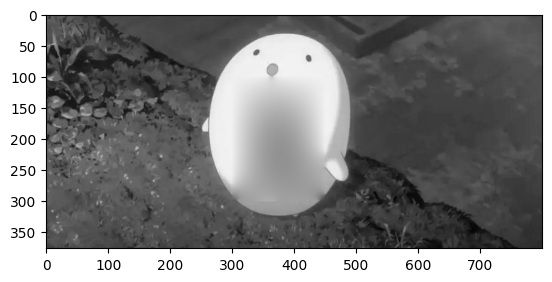

In [9]:
# Initial guess, mark the missing region with NaN
f_initial = np.copy(gray_img)
f_initial[mask == 0] = 0

#Set the Dirichlet boundary conditions using the known region
boundary_values = np.copy(gray_img)
boundary_values[mask == 0] = removed_image[mask == 0]

gray_img = np.uint8(gray_img)
g = cv2.Laplacian(gray_img, cv2.CV_64F)

interpolated_image = laplace_solver_gauss_seidel(f_initial, boundary_values, mask, g, max_iterations=5000)
plt.imshow(interpolated_image, cmap='gray')

For larger regions it becomes blurrier and requires more iterations to reach a similar level of accuracy than with smaller regions

## Task 2

# 

In [10]:
def apply_filter(src_img, kernel):
    # assert len(src_img.shape) == 2, print("Dimension mismatch! Please supply gray-scale image only!")
    # assert len(kernel.shape) == 2, print("Dimension mismatch! Please supply 2D kernel only!")
    height, width = src_img.shape
    fft_src = np.fft.fft2(src_img)
    fft_kernel = np.fft.fft2(kernel, (height, width)) #pads the kernel with zeros until it is the same size  
    
    #convolution theorem states that multiplying the image with the kernel in the frequency domain
    # is equivalent to to moving the kernel and applying that to image in the spatial domain
    fft_result = fft_src * fft_kernel
    rst_img = np.fft.ifft2(fft_result).real
    
    return rst_img

def get_sobel_kernel():
    Kx = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)])
    Ky = np.array([(1, 2, 1), (0, 0, 0), (-1, -2, -1)])
    return Kx, Ky

def apply_sobel_filter(img):
    Kx, Ky = get_sobel_kernel()
    Gx, Gy = apply_filter(img, Kx), apply_filter(img, Ky)
    gradient_map = np.sqrt(Gx ** 2 + Gy  ** 2)
    return gradient_map

def importing_gradients(f, boundary_values, mask, g,g2,  max_iterations = 3000, tol = 0.01):
    """
    Solve the Laplace equation with Dirichlet boundary conditions using the Gauss-Seidel method
    
    Parameters:
    - f: Initial guess for the solution
    - boundary_values: Dirichlet boundary values for f on the boundary 
    - mask: Mask
    - g: Guidance field (Laplacian of original picture)
    - max_iterations: Maximum number of iterations
    - tol: Convergence tolerance
    """
    src_top_left = (100, 15)
    tgt_top_left = (500, 250)
    
    # Calculate the offset
    offset_x = tgt_top_left[0] - src_top_left[0]
    offset_y = tgt_top_left[1] - src_top_left[1]
    
    f_old = np.copy(f)

    
    unknown_indices = np.where(mask == 0)
    test = zip(*unknown_indices)
    print(len(list(test)))
    
    tbar = tqdm(total = max_iterations)
    # Gauss-Seidel iterations
    for iteration in range(max_iterations):
         
        for i, j in zip(*unknown_indices):
            i_adj = i - offset_y
            j_adj = j - offset_x
            # guidance = g2[i,j]  - g[i_adj, j_adj] 
            guidance = g[i_adj, j_adj] - g2[i,j]
            # guidance = g[i_adj, j_adj]
            # Gauss-Seidel update formula
            f[i, j] = 0.25 * (f[i-1, j] + f[i+1, j] + f[i, j-1] + f[i, j+1] - guidance)

        tbar.update(1)
        
        f[:, 0] = boundary_values[:, 0]
        f[:, -1] = boundary_values[:, -1]
        f[0, :] = boundary_values[0, :]
        f[-1, :] = boundary_values[-1, :]

        diff = np.max(np.abs(f - f_old))
        if diff < tol:
            print(f'\nThe solution converged after {iteration} iterations')
            break 
        
        f_old = np.copy(f)
        
    tbar.close()
        
    return f

        

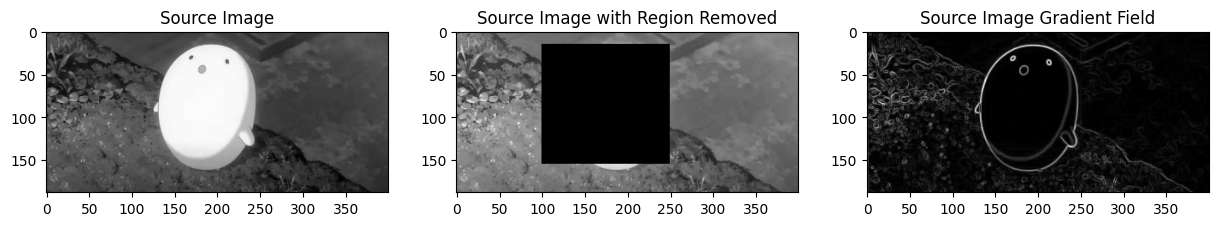

In [11]:
#load source image
target_image = cv2.imread('BatH_FarthestShore.png')
gray_target = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY).astype(np.float32)

source_img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')  # Replace 'your_image.jpg' with the path to your image
gray_source = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY).astype(np.float32)
height, width = gray_source.shape
new_height = height // 2
new_width = width // 2
gray_source = cv2.resize(gray_source, (new_width, new_height))
gradient_field = apply_sobel_filter(gray_source)

target_mask = np.ones_like(gray_target)
tgt_top_left = (500, 250)
bottom_right = (650, 390)
target_mask[tgt_top_left[1]:bottom_right[1], tgt_top_left[0]:bottom_right[0]] = 0

# Mark the selected region in the target image
marked_target = gray_target * target_mask

# plt.imshow(gray_source, cmap = 'gray')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Display the original image
ax1.imshow(gray_source, cmap='gray')  # Convert BGR to RGB for displaying with matplotlib
ax1.set_title('Source Image')

src_top_left = (100, 15)
bottom_right = (250, 155)

# Create a mask for the region to be removed
mask = np.ones_like(gray_source)
mask[src_top_left[1]:bottom_right[1], src_top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = gray_source * mask

# Display the original image with the region removed
ax2.imshow(removed_image, cmap='gray')
ax2.set_title('Source Image with Region Removed')

ax3.imshow(gradient_field, cmap = 'gray')
ax3.set_title('Source Image Gradient Field')

# Show the subplots
plt.show()


## Importing Gradients

21000


 91%|█████████ | 5445/6000 [03:45<00:22, 24.15it/s]


The solution converged after 5444 iterations


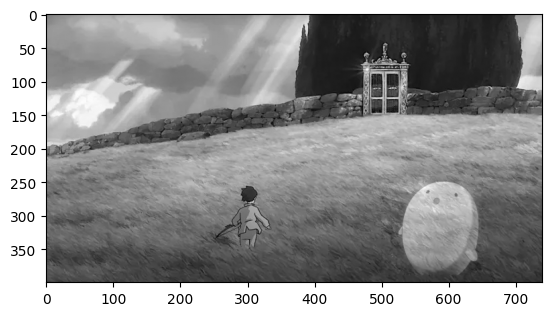

In [12]:
f_initial = np.copy(gray_target)
f_initial[target_mask == 0] = 0

boundary_values = np.copy(gray_target)

gray_source = np.uint8(gray_source)
gray_target = np.uint8(gray_target)

tgt_gradient_field = cv2.Laplacian(gray_target, cv2.CV_64F)
src_gradient_field = cv2.Laplacian(gray_source, cv2.CV_64F)

interpolated_image = importing_gradients(f_initial, boundary_values, target_mask, src_gradient_field, tgt_gradient_field, max_iterations=6000)
plt.imshow(interpolated_image, cmap = 'gray')

### Coloured images (Task 3)

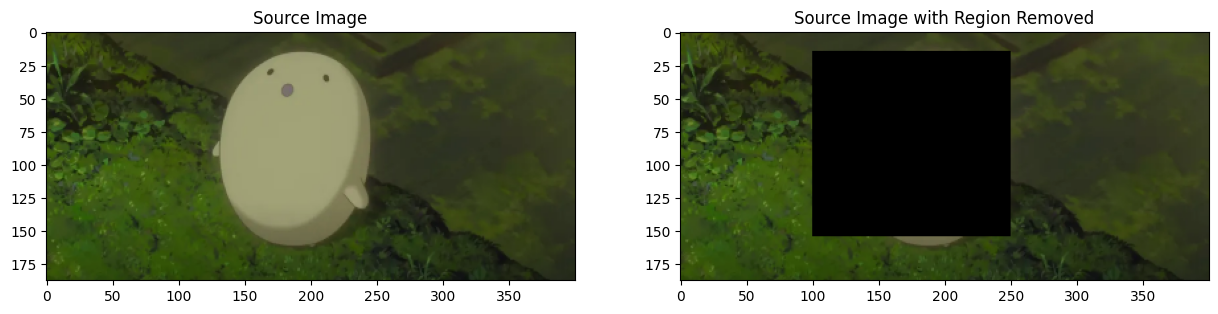

In [13]:
#load source image
target_image = cv2.imread('BatH_FarthestShore.png')

source_img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')
height, width, _ = source_img.shape
new_height = height // 2
new_width = width // 2
source_img = cv2.resize(source_img, (new_width, new_height))

target_mask = np.ones_like(target_image)
tgt_top_left = (500, 250)
bottom_right = (650, 390)
target_mask[tgt_top_left[1]:bottom_right[1], tgt_top_left[0]:bottom_right[0]] = 0

# Mark the selected region in the target image
marked_target = target_image * target_mask

# plt.imshow(gray_source, cmap = 'gray')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Display the original image
ax1.imshow(source_img)  
ax1.set_title('Source Image')

src_top_left = (100, 15)
bottom_right = (250, 155)

# Create a mask for the region to be removed
mask = np.ones_like(source_img)
mask[src_top_left[1]:bottom_right[1], src_top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = source_img * mask

# Display the original image with the region removed
ax2.imshow(removed_image)
ax2.set_title('Source Image with Region Removed')

# Show the subplots
plt.show()


float32
21000


 52%|█████▏    | 5214/10000 [03:32<03:14, 24.55it/s]



The solution converged after 5213 iterations
float32
21000


 57%|█████▋    | 5723/10000 [03:50<02:52, 24.82it/s]



The solution converged after 5722 iterations
float32
21000


 42%|████▏     | 4191/10000 [02:53<04:00, 24.14it/s]



The solution converged after 4190 iterations


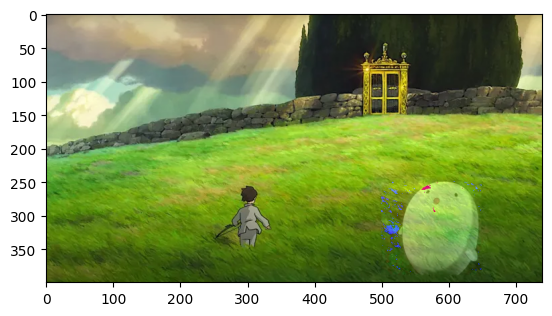

In [14]:
# Assuming source and target are your input color images
source = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB).astype(np.float32)
target = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB).astype(np.float32)
target_mask = cv2.cvtColor(target_mask, cv2.COLOR_BGR2GRAY).astype(np.float32)


# Initialize final output image
final_output = np.zeros_like(target)

# Process each channel separately
for channel in range(3):
    # Copy the target image
    f_initial = np.copy(target[:,:,channel])
    f_initial[target_mask == 0] = 0
    print(f_initial.dtype)

    # Copy the boundary values
    boundary_values = np.copy(target[:,:,channel])

    # Convert source and target to uint8
    source_channel = np.uint8(source[:,:,channel])
    target_channel = np.uint8(target[:,:,channel])

    # Compute the gradient fields
    tgt_gradient_field = cv2.Laplacian(target_channel, cv2.CV_64F)
    src_gradient_field = cv2.Laplacian(source_channel, cv2.CV_64F)

    # Compute the interpolated image
    interpolated_image = importing_gradients(f_initial, boundary_values, target_mask, src_gradient_field, tgt_gradient_field, max_iterations=10000)
    interpolated_image = np.uint8(interpolated_image)

    # Store the result in the corresponding channel of the final output image
    final_output[:,:,channel] = interpolated_image

# Display the final output image
final_output = np.uint8(final_output)
plt.imshow(final_output)
plt.show()


## Mixing Gradients (Back to Task 2)

In [15]:
def mixing_gradients(f, boundary_values, mask,src_grad, tgt_grad,  src_top_left = src_top_left, tgt_top_left = tgt_top_left, max_iterations = 10000, tol = 0.01):
    """
    Solve the Laplace equation with Dirichlet boundary conditions using the Gauss-Seidel method
    
    Parameters:
    - f: Initial guess for the solution
    - boundary_values: Dirichlet boundary values for f on the boundary 
    - mask: Mask
    - g: Guidance field (Laplacian of original picture)
    - max_iterations: Maximum number of iterations
    - tol: Convergence tolerance
    """
    src_top_left = (100, 15)
    tgt_top_left = (500, 250)
    
    # Calculate the offset
    offset_x = tgt_top_left[0] - src_top_left[0]
    offset_y = tgt_top_left[1] - src_top_left[1]
    
    f_old = np.copy(f)
    
    unknown_indices = np.where(mask == 0)
    
    abar = tqdm(total = max_iterations)
    # Gauss-Seidel iterations
    for iteration in range(max_iterations):
         
        
        for i, j in zip(*unknown_indices):
            i_adj = i - offset_y
            j_adj = j - offset_x
            
            # Gauss-Seidel update formula
            if np.abs(src_grad[i_adj, j_adj]) > np.abs(tgt_grad[i, j]):
                g = src_grad[i_adj, j_adj]
            else:
                g = tgt_grad[i, j]
                
            f[i, j] = 0.25 * (f[i-1, j] + f[i+1, j] + f[i, j-1] + f[i, j+1] - g)

        f[:, 0] = boundary_values[:, 0]
        f[:, -1] = boundary_values[:, -1]
        f[0, :] = boundary_values[0, :]
        f[-1, :] = boundary_values[-1, :]
        
        abar.update(1)
        
        # Check for convergence
        diff = np.max(np.abs(f - f_old))
        if diff < tol:
            print(f'\nThe solution converged after {iteration} iterations')
            break 
        
        f_old = np.copy(f)
        
    abar.close()
        
    return f
        

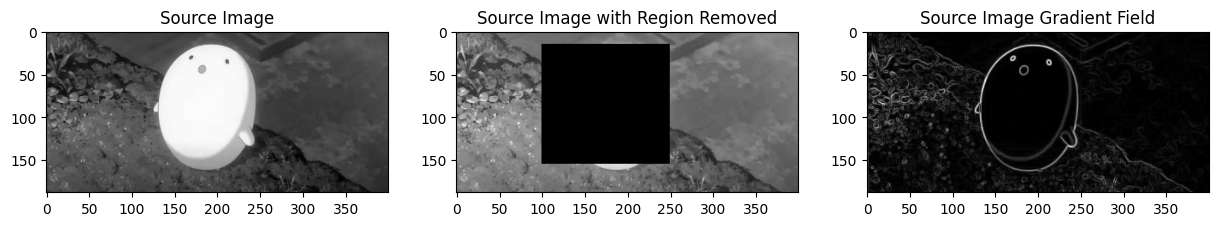

In [16]:
#load source image
target_image = cv2.imread('BatH_FarthestShore.png')
gray_target = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY).astype(np.float32)

source_img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')  # Replace 'your_image.jpg' with the path to your image
gray_source = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY).astype(np.float32)
height, width = gray_source.shape
new_height = height // 2
new_width = width // 2
gray_source = cv2.resize(gray_source, (new_width, new_height))
gradient_field = apply_sobel_filter(gray_source)

target_mask = np.ones_like(gray_target)
tgt_top_left = (500, 250)
bottom_right = (650, 390)
target_mask[tgt_top_left[1]:bottom_right[1], tgt_top_left[0]:bottom_right[0]] = 0

# Mark the selected region in the target image
marked_target = gray_target * target_mask

# plt.imshow(gray_source, cmap = 'gray')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Display the original image
ax1.imshow(gray_source, cmap='gray')  # Convert BGR to RGB for displaying with matplotlib
ax1.set_title('Source Image')

src_top_left = (100, 15)
bottom_right = (250, 155)

# Create a mask for the region to be removed
mask = np.ones_like(gray_source)
mask[src_top_left[1]:bottom_right[1], src_top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = gray_source * mask

# Display the original image with the region removed
ax2.imshow(removed_image, cmap='gray')
ax2.set_title('Source Image with Region Removed')

ax3.imshow(gradient_field, cmap = 'gray')
ax3.set_title('Source Image Gradient Field')

# Show the subplots
plt.show()


 41%|████      | 4061/10000 [05:03<07:23, 13.38it/s]


The solution converged after 4060 iterations


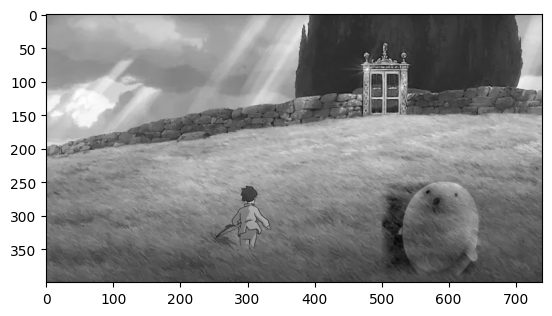

In [17]:
f_initial = np.copy(gray_target)
f_initial[target_mask == 0] = 0

boundary_values = np.copy(gray_target)

gray_target = np.uint8(gray_target)
gray_source = np.uint8(gray_source)

gradient_field_target = cv2.Laplacian(gray_target, cv2.CV_64F)
gradient_field_source = cv2.Laplacian(gray_source, cv2.CV_64F)


interpolated_image = mixing_gradients(f_initial, boundary_values, target_mask, gradient_field_source, gradient_field_target)
plt.imshow(interpolated_image, cmap = 'gray')


## Selection editing (Task 4)

In [18]:
def texture_flattening(f, boundary_values, mask, g,  max_iterations = 3000, tol = 0.01):
    """
    Solve the Laplace equation with Dirichlet boundary conditions using the Gauss-Seidel method
    
    Parameters:
    - f: Initial guess for the solution
    - boundary_values: Dirichlet boundary values for f on the boundary 
    - mask: Mask
    - g: Guidance field (Laplacian of original picture)
    - max_iterations: Maximum number of iterations
    - tol: Convergence tolerance
    """
    src_top_left = (100, 15)
    tgt_top_left = (500, 250)
    
    # Calculate the offset
    offset_x = tgt_top_left[0] - src_top_left[0]
    offset_y = tgt_top_left[1] - src_top_left[1]
    
    f_old = np.copy(f)

    
    unknown_indices = np.where(mask == 0)
    test = zip(*unknown_indices)
    
    tbar = tqdm(total = max_iterations)
    # Gauss-Seidel iterations
    for iteration in range(max_iterations):
         
        for i, j in zip(*unknown_indices):
            i_adj = i - offset_y
            j_adj = j - offset_x
            guidance = g[i_adj, j_adj]
            
            # Gauss-Seidel update formula
            f[i, j] = 0.25 * (f[i-1, j] + f[i+1, j] + f[i, j-1] + f[i, j+1] - guidance)

        tbar.update(1)
        
        f[:, 0] = boundary_values[:, 0]
        f[:, -1] = boundary_values[:, -1]
        f[0, :] = boundary_values[0, :]
        f[-1, :] = boundary_values[-1, :]

        diff = np.max(np.abs(f - f_old))
        if diff < tol:
            print(f'\nThe solution converged after {iteration} iterations')
            break 
        
        f_old = np.copy(f)
        
    tbar.close()
        
    return f


In [19]:
def edge_preserving_filter(img, low_threshold=20, high_threshold=70):

    # Apply Canny edge detection
    edges = cv2.Canny(img, low_threshold, high_threshold)
    

    # Create an empty output image
    output = np.zeros_like(img, dtype=np.float64)

    # Iterate over each pixel in the grayscale image
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            # If there's an edge between the current pixel and the one to the right
            if edges[y, x] > 0 and edges[y, x+1] > 0:
                output[y, x] = abs(int(img[y, x]) - int(img[y, x+1]))
            # If there's an edge between the current pixel and the one below
            elif edges[y, x] > 0 and edges[y+1, x] > 0:
                output[y, x] = abs(int(img[y, x]) - int(img[y+1, x]))
                
    return output

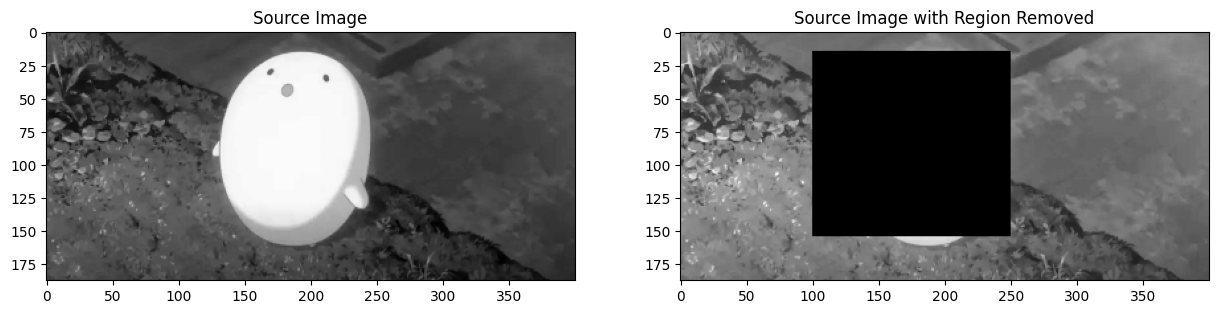

In [20]:
#load source image
target_image = cv2.imread('BatH_FarthestShore.png')
gray_target = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY).astype(np.float32)

source_img = cv2.imread('836a2c830d47dd13db451bb21f4b2ad796dcb6e8-1256x592.png')  # Replace 'your_image.jpg' with the path to your image
gray_source = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY).astype(np.float32)
height, width = gray_source.shape
new_height = height // 2
new_width = width // 2
gray_source = cv2.resize(gray_source, (new_width, new_height))

target_mask = np.ones_like(gray_target)
tgt_top_left = (500, 250)
bottom_right = (650, 390)
target_mask[tgt_top_left[1]:bottom_right[1], tgt_top_left[0]:bottom_right[0]] = 0

# Mark the selected region in the target image
marked_target = gray_target * target_mask

# plt.imshow(gray_source, cmap = 'gray')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Display the original image
ax1.imshow(gray_source, cmap='gray')  # Convert BGR to RGB for displaying with matplotlib
ax1.set_title('Source Image')

src_top_left = (100, 15)
bottom_right = (250, 155)

# Create a mask for the region to be removed
mask = np.ones_like(gray_source)
mask[src_top_left[1]:bottom_right[1], src_top_left[0]:bottom_right[0]] = 0

# Remove the selected region from the original image
removed_image = gray_source * mask

# Display the original image with the region removed
ax2.imshow(removed_image, cmap='gray')
ax2.set_title('Source Image with Region Removed')

# Show the subplots
plt.show()


100%|██████████| 4000/4000 [02:21<00:00, 28.17it/s]


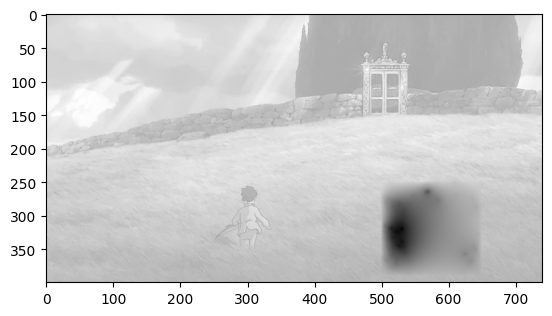

In [21]:
gray_source = np.uint8(gray_source)
# mask = edge_preserving_filter(gray_source)
gradient_field_source = edge_preserving_filter(cv2.Laplacian(gray_source, cv2.CV_8U))

f_initial = np.copy(gray_target)
f_initial[target_mask == 0] = 0
boundary_values = np.copy(gray_target)

interpolated_image = texture_flattening(f_initial, boundary_values, target_mask, gradient_field_source, max_iterations=4000)
plt.imshow(interpolated_image, cmap = 'gray')

